In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [3]:
with pd.HDFStore("./data/train.h5", "r") as train:
    df = train.get("train")

In [80]:
# Walking through the kernel found at https://www.kaggle.com/chenjx1005/physical-meanings-of-technical-20-30

In [5]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge


Per the evaluation page: "Submissions will be evaluated on the R value between the predicted and actual values. The R value similar to the R squared value, also called the coefficient of determination." \\[R^2 = 1- \frac{\sum (y-\hat{y})^2}{\sum (y-\mu)^2}\\] \\[R = sign(R)\sqrt(|R|)\\]

In [6]:
def get_reward(y_true, y_fit):
    R2 = 1 - np.sum((y_true - y_fit)**2) / np.sum((y_true - np.mean(y_true))**2)
    R = np.sign(R2) * np.sqrt(abs(R2))
    return(R)

1561


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


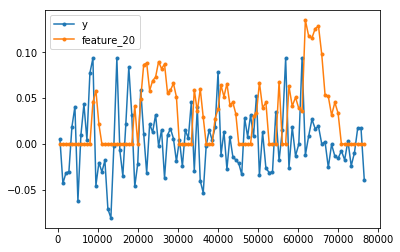

In [32]:
# Arbitrarily select an id from the possible id found in y
id = 1561 #val_set.id.sample().values[0]
print(id)
temp = df[df.id==id]
temp['feature_20'] = temp['technical_20']
# Scaled by a factor (e.g. 10) for better visualization
temp['feature_20'] = temp['feature_20']*10 
temp[['y', 'feature_20']].iloc[:100].plot(marker='.')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


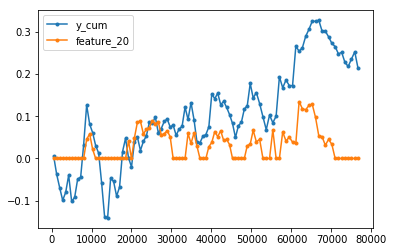

In [33]:
# Since naively plotting results in no clear visual pattern, the author looks to compare
# against cum sum.
temp['y_cum'] = temp.y.cumsum()
temp[['y_cum', 'feature_20']].iloc[:100].plot(marker='.')

In [18]:
# Visually the author sees that on up moves, the indicator technical_20 increases..while on down trends,
# indicator is floored at 0. 

1561


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

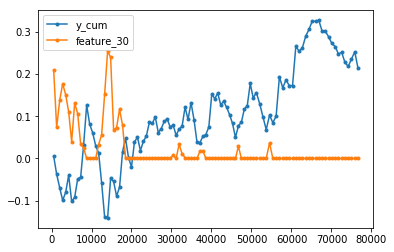

In [24]:
# Check technical_30. The observation is similar, though instead we see on down days, the indicator increase in value.
id = 1561 #val_set.id.sample().values[0]
print(id)
temp = df[df.id==id]
temp['feature_30'] = temp['technical_30']
temp['feature_30'] = temp['feature_30']*20 
temp['y_cum'] = temp.y.cumsum()
temp[['y_cum', 'feature_30']].iloc[:100].plot(marker='.')

In [26]:
# Continue by checking if the correlation values in fact reflect the visual intuition. The values are reversed.
print(np.correlate(temp['y'], temp['technical_20']))
print(np.correlate(temp['y'], temp['technical_30']))

[-0.00031708]
[ 0.00022395]


In [28]:
df.shape

(1710756, 111)

In [29]:
# Assess the univariate results of feature technical_20
# TODO: Run linear regression against technical_20

In [56]:
# The observation made is that there might be a lagged relationship
temp.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y,feature_20,y_cum,y_lag
540,1561,0,0.793587,0.31323,0.232583,1.585102,0.209877,0.034863,NaN,-0.217738,...,NaN,0.675182,NaN,NaN,0.0,NaN,0.005458,0.0,0.005458,-0.042911
1290,1561,1,0.793587,0.31323,0.232583,1.566851,0.209877,0.018017,NaN,-0.208289,...,NaN,0.683772,NaN,NaN,0.0,NaN,-0.042911,0.0,-0.037453,-0.031655
2040,1561,2,0.793587,0.31323,0.232583,1.559579,0.209877,0.011305,NaN,-0.204524,...,NaN,0.687195,NaN,NaN,0.0,NaN,-0.031655,0.0,-0.069108,-0.030017
2790,1561,3,0.793587,0.31323,0.232583,1.553305,0.209877,0.005514,NaN,-0.201276,...,NaN,0.690148,NaN,NaN,0.0,NaN,-0.030017,0.0,-0.099125,0.018642
3540,1561,4,0.793587,0.31323,0.232583,1.543200,0.209877,-0.003813,NaN,-0.196045,...,NaN,0.694904,NaN,NaN,0.0,NaN,0.018642,0.0,-0.080483,0.040742


In [65]:
temp['y_lag'] = temp.y.shift(-2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
temp[['y','y_lag']].head(5)

,y,y_lag
540,0.005458,-0.031655
1290,-0.042911,-0.030017
2040,-0.031655,0.018642
2790,-0.030017,0.040742
3540,0.018642,-0.062122


In [71]:
# After confirming hypothesis that the lagged relationship matters, the author constructs a new feature,
# the difference between the technical indicator 20 and 30.

In [69]:
temp = df.copy()
temp['feature'] = temp['technical_20'] - temp['technical_30']
n = 5 # the number of days to use for prediction.
for i in range(1, n+1):
    temp['fea_%d'%i] = temp.groupby('id')['y'].shift(i)
temp = temp.filter(regex='^fea').dropna()
estimator = LinearRegression()
estimator.fit(temp.filter(regex='^fea_').values, temp.feature.values)
#temp['pred_f'] = eastimator.predict(temp.filter(regex='^fea_').fillna(mean_vals).values)
print(estimator.intercept_, estimator.coef_)

0.000143608 [ 0.06922237  0.06366353  0.05833869  0.05318845  0.04781544]


142


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

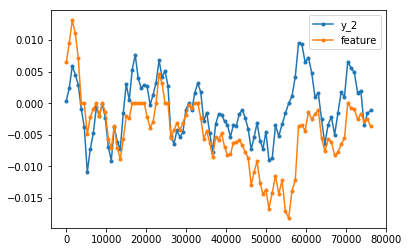

In [72]:
id = 142 #full_df.id.sample().values[0]
print(id)
temp = df[df.id==id]
temp['feature'] = temp['technical_20'] - temp['technical_30']
mean_vals = temp.y.mean()
for i in range(1, n+1):
    temp['fea_%d'%i] = temp['y'].shift(i)
temp['y_2'] = estimator.predict(temp.filter(regex='^fea_').fillna(mean_vals).values)
temp[['y_2', 'feature']].iloc[:100,:].plot(marker='.')

5.77914e-05 [ 0.06911031  0.06370527  0.05868766  0.05390181  0.04941773  0.04538222
  0.04167265  0.03830544  0.03509724  0.03224535  0.02948501  0.02703378
  0.02481007  0.0225402   0.02038282  0.01871878  0.01710866  0.01583168
  0.01470541  0.01309998]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

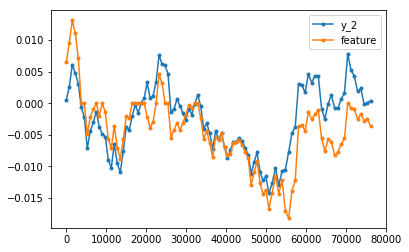

In [73]:
# The results are convincing as the predicted feature appears to replicate the true feature.
# We can check higher values of n to see if the fit improves.
temp = df.copy()
temp['feature'] = temp['technical_20'] - temp['technical_30']
n = 20
for i in range(1, n+1):
    temp['fea_%d'%i] = temp.groupby('id')['y'].shift(i)
temp = temp.filter(regex='^fea').dropna()
estimator = LinearRegression()
estimator.fit(temp.filter(regex='^fea_').values, temp.feature.values)
#temp['pred_f'] = eastimator.predict(temp.filter(regex='^fea_').fillna(mean_vals).values)
print(estimator.intercept_, estimator.coef_)

id = 142 #full_df.id.sample().values[0]
temp = df[df.id==id]
temp['feature'] = temp['technical_20'] - temp['technical_30']
mean_vals = temp.y.mean()
for i in range(1, n+1):
    temp['fea_%d'%i] = temp['y'].shift(i)
temp['y_2'] = estimator.predict(temp.filter(regex='^fea_').fillna(mean_vals).values)
temp[['y_2', 'feature']].iloc[:100,:].plot(marker='.')

In [74]:
# We go on to confim the shrink factor, as the weights appear to be shrinking as the lag increases.
# 0.92
for i in range(len(estimator.coef_)-1):
    print(estimator.coef_[i+1]/estimator.coef_[i])

0.921791
0.921237
0.918452
0.91681
0.918339
0.91826
0.919198
0.916247
0.918743
0.914396
0.916865
0.917743
0.90851
0.904287
0.918361
0.913984
0.925361
0.92886
0.890827


It seems the shrink scale is around 0.92. Denote technical_20-30 as F, So we assume F(t) = 0.07 y(t-1) + 0.92 F(t-1). Have a quick verification.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


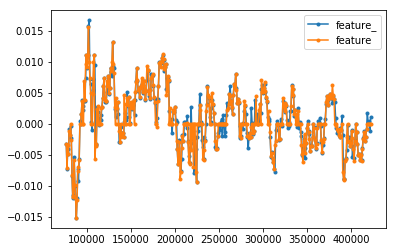

In [77]:
temp['feature_'] = 0.07 * temp['fea_1'] + 0.92 * temp['feature'].shift(1)
temp[['feature_', 'feature']].iloc[100:500,:].plot(marker='.')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


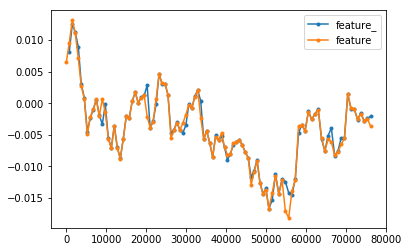

In [79]:
# A separate observer commenting on the kernel suggests that adding technical_13 to technical_20
# then subtracting technical_30 resulted in better results

temp['feature'] = (temp['technical_20']  + temp['technical_13'])- temp['technical_30']
temp['feature_'] = 0.07 * temp['y'].shift(1) + 0.92 * temp['feature'].shift(1)
temp[['feature_', 'feature']].iloc[:100,:].plot(marker='.')